![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

# Laboratorio 03: Procesamiento de lenguaje natural con Python
## Introducción a _Data Science_

<!--<center>
    <img src='images/GAN.jpeg'style="width: 600px;">
</center>-->

**Profesor**: Juan Bekios Calfa

**Carreras**: ICCI, ITI, ICI

<!--<sub><sup>Tutorial: GANS. Sensio Artificial Intelligence [link](https://sensioai.com/blog/051_gans)</sup></sub> -->



---
**Nombre del alumno**: --Indicar nombre completo--

**Carrera**: -- Indicar carrera --

---

# 1. Introducción

El laboratorio se centra en el tratamiento de **datos de texto libre**.  Además, de los **datos estructurado**s y de los **grafos** que hemos analizado anteriormente, el **texto libre** constituye uno de los tipos más comunes de datos "ampliamente disponibles": 

* Las páginas web
* Los campos de "comentarios" no estructurados de muchas bases de datos relacionales 
* Otras fuentes de datos de gran tamaño fáciles de obtener vienen naturalmente en forma de texto libre.  

La diferencia notable, por supuesto, es que, a diferencia de los tipos de datos que hemos analizado antes, el texto libre carece de la estructura "fácilmente extraíble" inherente a los tipos de datos anteriores que hemos considerado.

El laboratorio tiene como objetivo conocer algunas técnicas para pre-procesar texto para ser utilizado como entrada a un clasificador o regresor.

Se estudiarán diferentes librerías que permiten preparar el texto para luego codificarlo en una estructura de datos manejable.

## 1.5 Visualización de palabras (TF)

El modelo de bolsa de palabras (*Bag of words*) es, con mucho, el medio más común de representar documentos en la **ciencia de datos**. Según este modelo, un documento se describe únicamente por el conjunto de palabras (y posiblemente su número) que lo componen. Se ignora toda la información sobre el orden real de las palabras. Se trata esencialmente de la llamada "nube de palabras" de un documento.

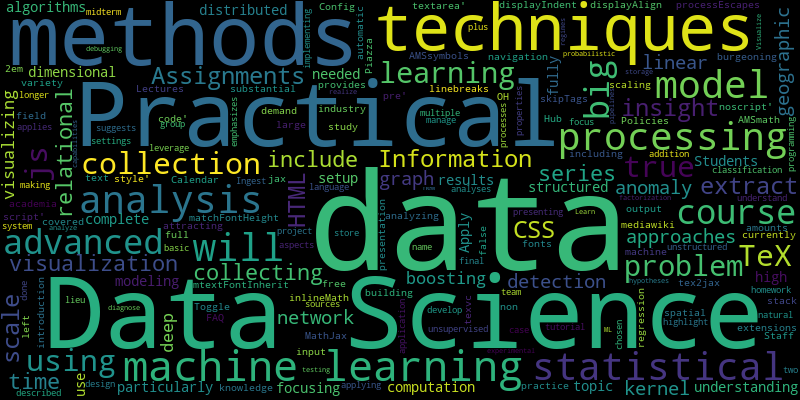

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("http://www.datasciencecourse.org")
root = BeautifulSoup(response.content, "lxml")

root.text

from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", root.text))
wc.to_image()

In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wikipedia

# Wikipedia español
wikipedia.set_lang("es")
results_list = wikipedia.search("Barack", results=100)

for each_result in results_list:
  print(each_result)

Barack Obama
Campaña presidencial de Barack Obama de 2008
Barack (desambiguación)
Primera investidura presidencial de Barack Obama
Academia de Liderazgo para Jóvenes Barack Obama
Presidencia de Barack Obama
Moisés Barack
Transición presidencial de Barack Obama
Barack (licor)
Segunda investidura presidencial de Barack Obama
Cartel "Hope" de Obama
Confirmación del Gabinete de Barack Obama
Elecciones presidenciales de Estados Unidos de 2012
Primarias del Partido Demócrata de 2008 en Carolina del Sur
Michelle Obama
Christopher B. Duncan
Devon Terrell
Primarias del Partido Demócrata de 2008 en el Distrito de Columbia
Primarias del Partido Demócrata de 2008 en Georgia
Republicanos por Obama
Primarias del Partido Demócrata de 2008 en el extranjero
Tom Pérez
It's a New Day
Convención Nacional Demócrata de 2012
Primarias del Partido Demócrata de 2008 en Puerto Rico
Steven Chu
Mark Wakefield
111.º Congreso de los Estados Unidos
Asambleas presidenciales del Partido Demócrata de 2008 en Alaska
Leo

Extraemos dos textos de la base de datos

In [ ]:
bo01 = wikipedia.page("Barack Obama")
bo01.content

'Barack Hussein Obama II[1]\u200b ( [bəˈrɑːk huːˈseɪn oʊˈbɑːmə]  en inglés estadounidense; Honolulu, 4 de agosto de 1961) es un político estadounidense que ejerció como el 44.º presidente de los Estados Unidos de América desde el 20 de enero de 2009 hasta el 20 de enero de 2017.[2]\u200b Fue senador por el estado de Illinois desde el 3 de enero de 2005 hasta su renuncia el 16 de noviembre de 2008.[3]\u200b Además, es el quinto legislador afrodescendiente en el Senado de los Estados Unidos, tercero desde la era de reconstrucción. También fue el primer candidato afroestadounidense nominado a la presidencia por el Partido Demócrata y el primero en ejercer el cargo presidencial.[4]\u200b\nSe graduó en la Universidad de Columbia y en la prestigiosa escuela de Derecho Harvard Law School, donde fue presidente de la revista Harvard Law Review.[5]\u200b Posteriormente, trabajó como organizador comunitario y ejerció su carrera como abogado en derechos civiles, antes de ser elegido senador del es

In [ ]:
bo02 = wikipedia.page("Moisés Barack")
bo02.content

'Moisés Barack Caycho (Pisco, 26 de diciembre de 1943) es un exfutbolista y entrenador peruano, considerado uno de los mejores entrenadores del fútbol peruano. Su último trabajo profesional fue en Sport Huancayo de la Primera División del Perú y actualmente dirige el equipo de la Universidad Alas Peruanas con miras al Mundial Universitario de Rusia.\n\n\n== Trayectoria ==\n\n\n=== Como jugador ===\nComenzó como marcador de punta en Juventud Gloria de la Segunda División del Perú. En 1960 pasó a Centro Iqueño por 2 temporadas, dirigido por el director técnico paraguayo Miguel Ortega.\nEn 1962 fue contratado por Universitario donde jugó 4 temporadas saliendo campeón en 1964, considerado como el mejor marcador de punta de dicho campeonato. En 1966 regresó al Centro Iqueño por 2 temporadas, en 1968 jugó en el Octavio Espinosa de Ica, finalmente en 1969 jugó en el Porvenir Miraflores por 2 temporadas donde terminó su carrera.\nFue parte de la Selección pre-olímpica para las Olimpiadas de Ro

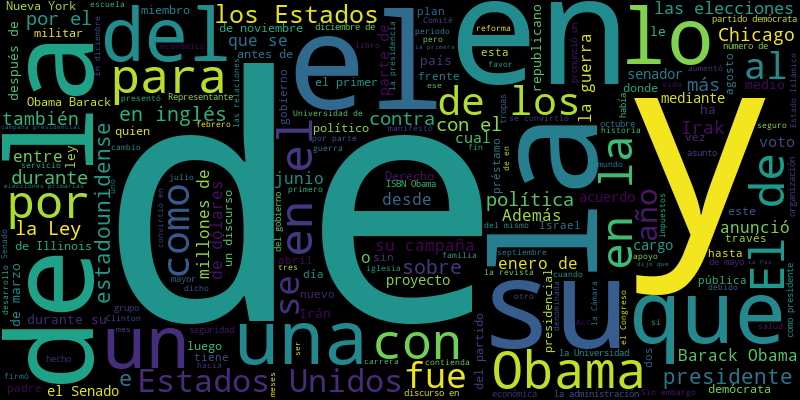

In [ ]:
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", bo01.content))
wc.to_image()

# NLTK

## Instalar librerías

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
# Obtener TOKENs del texto
tokens = nltk.word_tokenize(bo01.content)
print(tokens)

['Barack', 'Hussein', 'Obama', 'II', '[', '1', ']', '\u200b', '(', '[', 'bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə', ']', 'en', 'inglés', 'estadounidense', ';', 'Honolulu', ',', '4', 'de', 'agosto', 'de', '1961', ')', 'es', 'un', 'político', 'estadounidense', 'que', 'ejerció', 'como', 'el', '44.º', 'presidente', 'de', 'los', 'Estados', 'Unidos', 'de', 'América', 'desde', 'el', '20', 'de', 'enero', 'de', '2009', 'hasta', 'el', '20', 'de', 'enero', 'de', '2017', '.', '[', '2', ']', '\u200b', 'Fue', 'senador', 'por', 'el', 'estado', 'de', 'Illinois', 'desde', 'el', '3', 'de', 'enero', 'de', '2005', 'hasta', 'su', 'renuncia', 'el', '16', 'de', 'noviembre', 'de', '2008', '.', '[', '3', ']', '\u200b', 'Además', ',', 'es', 'el', 'quinto', 'legislador', 'afrodescendiente', 'en', 'el', 'Senado', 'de', 'los', 'Estados', 'Unidos', ',', 'tercero', 'desde', 'la', 'era', 'de', 'reconstrucción', '.', 'También', 'fue', 'el', 'primer', 'candidato', 'afroestadounidense', 'nominado', 'a', 'la', 'presidencia', 'por

## Algunos comandos

### Eliminar signos de puntuación en el texto

In [ ]:
# Eliminar espacios 
nueva_linea = re.sub(r"\s+"," ", bo01.content)
tokens = nltk.word_tokenize(nueva_linea)
print(tokens)

['Barack', 'Hussein', 'Obama', 'II', '[', '1', ']', '\u200b', '(', '[', 'bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə', ']', 'en', 'inglés', 'estadounidense', ';', 'Honolulu', ',', '4', 'de', 'agosto', 'de', '1961', ')', 'es', 'un', 'político', 'estadounidense', 'que', 'ejerció', 'como', 'el', '44.º', 'presidente', 'de', 'los', 'Estados', 'Unidos', 'de', 'América', 'desde', 'el', '20', 'de', 'enero', 'de', '2009', 'hasta', 'el', '20', 'de', 'enero', 'de', '2017', '.', '[', '2', ']', '\u200b', 'Fue', 'senador', 'por', 'el', 'estado', 'de', 'Illinois', 'desde', 'el', '3', 'de', 'enero', 'de', '2005', 'hasta', 'su', 'renuncia', 'el', '16', 'de', 'noviembre', 'de', '2008', '.', '[', '3', ']', '\u200b', 'Además', ',', 'es', 'el', 'quinto', 'legislador', 'afrodescendiente', 'en', 'el', 'Senado', 'de', 'los', 'Estados', 'Unidos', ',', 'tercero', 'desde', 'la', 'era', 'de', 'reconstrucción', '.', 'También', 'fue', 'el', 'primer', 'candidato', 'afroestadounidense', 'nominado', 'a', 'la', 'presidencia', 'por

In [ ]:
from nltk.corpus import stopwords

# Palabras innecesarias
sw = stopwords.words('spanish')
sw.append("En")
sw.append("El")

# Lista van a quedar las palabras filtradas
filtered_sentence = []
for w in tokens: 
    if w not in sw: 
        filtered_sentence.append(w)

print(filtered_sentence)

['Barack', 'Hussein', 'Obama', 'II', '[', '1', ']', '\u200b', '(', '[', 'bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə', ']', 'inglés', 'estadounidense', ';', 'Honolulu', ',', '4', 'agosto', '1961', ')', 'político', 'estadounidense', 'ejerció', '44.º', 'presidente', 'Estados', 'Unidos', 'América', '20', 'enero', '2009', '20', 'enero', '2017', '.', '[', '2', ']', '\u200b', 'Fue', 'senador', 'Illinois', '3', 'enero', '2005', 'renuncia', '16', 'noviembre', '2008', '.', '[', '3', ']', '\u200b', 'Además', ',', 'quinto', 'legislador', 'afrodescendiente', 'Senado', 'Estados', 'Unidos', ',', 'tercero', 'reconstrucción', '.', 'También', 'primer', 'candidato', 'afroestadounidense', 'nominado', 'presidencia', 'Partido', 'Demócrata', 'primero', 'ejercer', 'cargo', 'presidencial', '.', '[', '4', ']', '\u200b', 'Se', 'graduó', 'Universidad', 'Columbia', 'prestigiosa', 'escuela', 'Derecho', 'Harvard', 'Law', 'School', ',', 'presidente', 'revista', 'Harvard', 'Law', 'Review', '.', '[', '5', ']', '\u200b', 'Posterio

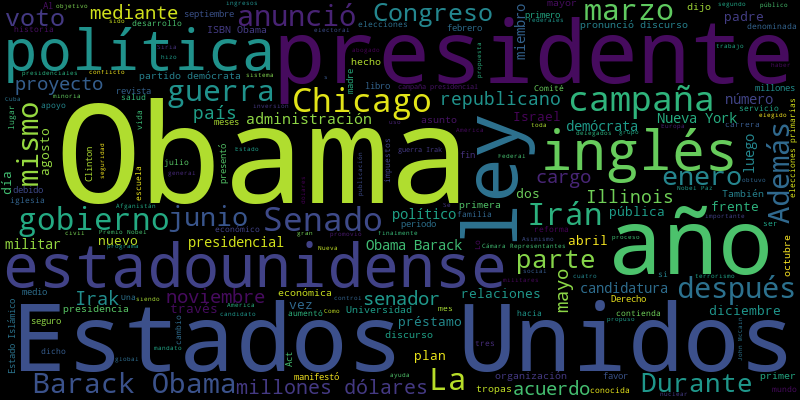

In [ ]:
wc = WordCloud(width=800,height=400).generate(" ".join(filtered_sentence))
wc.to_image()

### Configurar el corpus a español y crearlo

## Obtener los vectores de frecuencia (TF, *term frequency matrix*) 

---

En este caso, podemos representar los documentos mediante una matriz de frecuencias de términos de $m \times n$, donde $m$ indica el número de documentos y $n$ el tamaño del vocabulario (es decir, el número de palabras únicas en todos los documentos).  Para ver (de forma ingenua) cómo construir esta lista, consideremos primero una forma sencilla de obtener una lista de todas las palabras únicas en todos los documentos.  En general, no es necesario ordenar la lista de palabras, pero lo haremos por simplicidad.  Es una buena idea generar también un diccionario que asigne las palabras a su índice en esta lista, ya que con frecuencia querremos buscar el índice correspondiente a una palabra.

In [ ]:
vocab_dict = {k:i for i,k in enumerate(filtered_sentence)}

print(filtered_sentence, "\n")
print(vocab_dict, "\n")

['Barack', 'Hussein', 'Obama', 'II', '[', '1', ']', '\u200b', '(', '[', 'bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə', ']', 'inglés', 'estadounidense', ';', 'Honolulu', ',', '4', 'agosto', '1961', ')', 'político', 'estadounidense', 'ejerció', '44.º', 'presidente', 'Estados', 'Unidos', 'América', '20', 'enero', '2009', '20', 'enero', '2017', '.', '[', '2', ']', '\u200b', 'Fue', 'senador', 'Illinois', '3', 'enero', '2005', 'renuncia', '16', 'noviembre', '2008', '.', '[', '3', ']', '\u200b', 'Además', ',', 'quinto', 'legislador', 'afrodescendiente', 'Senado', 'Estados', 'Unidos', ',', 'tercero', 'reconstrucción', '.', 'También', 'primer', 'candidato', 'afroestadounidense', 'nominado', 'presidencia', 'Partido', 'Demócrata', 'primero', 'ejercer', 'cargo', 'presidencial', '.', '[', '4', ']', '\u200b', 'Se', 'graduó', 'Universidad', 'Columbia', 'prestigiosa', 'escuela', 'Derecho', 'Harvard', 'Law', 'School', ',', 'presidente', 'revista', 'Harvard', 'Law', 'Review', '.', '[', '5', ']', '\u200b', 'Posterio

## Vectores de frecuencia utilizando sklearn

Listaremos las palabras que no tienen relevancia en un texto y es preferible eliminarlas (*stop words*).

In [ ]:
# Librerías sklearn - Machine Learning
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

sw = stopwords.words('spanish')
print(sw)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Calculamos el vector TF.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sw = stopwords.words('spanish')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw)

# Matriz de frecuencia 
freq_matrix = vectorizer.fit_transform([bo01.content, bo02.content])
#print(freq_matrix)

feature_names = vectorizer.get_feature_names()
dense_frec = freq_matrix.todense()
denselist_frec = dense_frec.tolist()
df = pd.DataFrame(denselist_frec, columns=feature_names)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0307237699,05,10,100,101,102,103,104,...,ética,índices,órdenes,última,últimamente,últimas,último,últimos,únicamente,único
0,1,11,2,2,7,1,1,1,1,1,...,1,2,2,1,0,1,1,1,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Calculamos el vector TF eliminando las palabras que contengan caracteres que no sean alfanuméricos.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sw = stopwords.words('spanish')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+')

freq_matrix = vectorizer.fit_transform([bo01.content, bo02.content])
# print(freq_matrix)
feature_names = vectorizer.get_feature_names()

dense_frec = freq_matrix.todense()
denselist_frec = dense_frec.tolist()
df = pd.DataFrame(denselist_frec, columns=feature_names)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandonase,abandonó,abbas,abbottabad,abc,abdul,abierta,abierto,abogado,abogados,...,ética,índices,órdenes,última,últimamente,últimas,último,últimos,únicamente,único
0,1,1,1,1,1,1,1,1,2,3,...,1,2,2,1,0,1,1,1,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


## Obtener frecuencia inversa entre documentos (idf)

### Frecuencia inversa del documento 

Un problema obvio con el uso de recuentos de frecuencia de términos normales para representar un documento es que el vector del documento (y las similitudes resultantes que consideraremos) a menudo estará "dominado" por palabras muy comunes, por ejemplo "de", "el", "es", en los documentos de ejemplo anteriores.  Este problema puede mitigarse hasta cierto punto excluyendo las llamadas "stop words" (palabras comunes en inglés como "the", "a", "of" que no se consideran relevantes para los documentos concretos) de la matriz de frecuencia de términos.  Pero esto sigue ignorando el caso en el que una palabra que puede no ser una palabra de parada genérica sigue apareciendo en un gran número de documentos.  Intuitivamente, esperamos que las palabras más "importantes" de un documento sean precisamente las que sólo aparecen en un número relativamente pequeño de documentos, por lo que queremos descontar el peso de los términos que aparecen con mucha frecuencia.

Esto puede lograrse mediante el peso de la frecuencia inversa de los documentos para las palabras.  Al igual que con las frecuencias de términos, existen diferentes ponderaciones de este término, pero la formulación más común es

\begin{equation}
\mathrm{idf}_j = \log\left(\frac{\mbox{# documents}}{\mbox{# documents with word $j$}}\right).
\end{equation}

Por ejemplo, si la palabra aparece en todos los documentos, el peso de la frecuencia inversa del documento será cero (logaritmo de uno).  Por el contrario, si una palabra sólo aparece en un documento, su frecuencia documental inversa será $\log (\mbox{# documentos})$.

Tenga en cuenta que la frecuencia inversa de documentos es un término _por palabra_, a diferencia de la frecuencia de términos, que es _por palabra y documento_.  Podemos calcular la frecuencia inversa de documentos para nuestro conjunto de datos de la siguiente manera, que principalmente sólo requiere contar cuántos documentos contienen cada palabra.

## Obtener frecuencia inversa entre documentos (idf) de forma directa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(freq_matrix)

dense = tfidf_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,abandonase,abandonó,abbas,abbottabad,abc,abdul,abierta,abierto,abogado,abogados,...,ética,índices,órdenes,última,últimamente,últimas,último,últimos,únicamente,único
0,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.008686,0.013028,...,0.004343,0.008686,0.008686,0.004343,0.000000,0.004343,0.003090,0.004343,0.004343,0.008686
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040789,0.000000,0.029022,0.000000,0.000000,0.000000


In [ ]:
vectorizer = TfidfVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+')
vectors = vectorizer.fit_transform([bo01.content, bo02.content])
# print(vectors)
feature_names = vectorizer.get_feature_names()
# print(feature_names)
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandonase,abandonó,abbas,abbottabad,abc,abdul,abierta,abierto,abogado,abogados,...,ética,índices,órdenes,última,últimamente,últimas,último,últimos,únicamente,único
0,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.004343,0.008686,0.013028,...,0.004343,0.008686,0.008686,0.004343,0.000000,0.004343,0.003090,0.004343,0.004343,0.008686
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040789,0.000000,0.029022,0.000000,0.000000,0.000000


# Tarea

1. Obtener los 100 primeros documentos de Wikipedia y crear un corpus.
2. Obtener 5 documentos no utilizados para entrenar el corpus y generar:

    1. Vectores tf.
    2. Vectores idf a partir del vector tf.
    3. Vector idf de manera directa.
    4. **Explicar los resultados.**. ¿Qué problemas observó con las difentes técnicas utilizadas?
    5. Comparar la semejanza de todos los documentos utilizando TF. ¿Cual es el más parecido?. 
    6. Comparar la semejanza de todos los documentos utilizando TF-IDF. ¿Cual es el más parecido?.
    7. A su juicio, ¿cual de las dos codificaciones de texto es mejor?. **Explicar los resultados.**
    
    Calcule la matriz de semejanza para una mejor explicación. Utilice el siguiente ejemplo:
        

|           	| $Documento_3$ 	|  $Documento_4$	 | $Documento_5$ | $Documento_6$| $Documento_7$ 	 |
|-----------	|:-------------:|:------------:|:-------------:|:-------------:|:------------:|
| $Documento_3$ |    1.00  	  |    0.00  	 |    0.00  	  |    0.00  	 |    0.00  	  |
| $Documento_4$ |    0.00  	  |    1.00  	 |    0.00  	  |    0.00  	 |    0.00  	  |
| $Documento_5$ |    0.00  	  |    0.00  	 |    1.00  	  |    0.00  	 |    0.00  	  |
| $Documento_6$ |    0.00  	  |    0.00  	 |    0.00  	  |    1.00  	 |    0.00  	  |
| $Documento_7$ |    0.00  	  |    0.00  	 |    0.00  	  |    0.00  	 |    1.00  	  |

**Fecha de entrega**: Jueves 6 de mayo.

# I. Anexo: Similitud del coseno

Dada una matriz TF-IDF (o simplemente frecuencia de término), una de las preguntas más comunes a abordar es calcular la similitud entre varios documentos en el _corpus_.  Una medida común (métrica) para hacerlo es calcular la similitud del coseno entre dos documentos diferentes. Esto es simplemente un producto interno normalizado entre los vectores que describen cada documento. Específicamente,

\begin{equation}
\mbox{SimilitudCoseno}(x,y) = \frac{x^T y}{\|x\|_2 \cdot \|y\|_2}.
\end{equation}

La **similitud del coseno** es un número entre cero (lo que significa que los dos documentos no comparten términos en común) y uno (lo que significa que los dos documentos tienen exactamente la misma frecuencia de términos o representación TFIDF). De hecho, la similitud del coseno es exactamente la inversa de la distancia Eucliean al cuadrado entre los vectores de documentos normalizados; formalmente, para $\tilde{x} = x / \|x\|_2$ and $\tilde{y} = y / \|y\|_2$,

\begin{equation}
\begin{split}
\frac{1}{2}\|\tilde{x} - \tilde{y}\|_2^2 & = \frac{1}{2}(\tilde{x} - \tilde{y})^T (\tilde{x} - \tilde{y}) \\
& = \frac{1}{2} (\tilde{x}^T \tilde{x} - 2 \tilde{x}^T \tilde{y} + \tilde{y}^T \tilde{y}) \\
& = \frac{1}{2} (1 - 2 \tilde{x}^T \tilde{y} + 1) \\
& = 1 - \mbox{SimilitudCoseno}(x,y).
\end{split}
\end{equation}

Podemos calcular la similitud del coseno entre los vectores TFIDF en nuestro corpus de la siguiente manera.

In [ ]:
import numpy as np

# Normalizamos los documentos
X_tfidf_norm = dense / np.linalg.norm(dense, axis=1)[:,None]
# Calculamos la similitud del coseno a partir de la última fórmula.
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)